img_path:/home/niu/Liang_Niu3/IIT_Affordances_2017/rgb/, pred_path:/home/niu/src/Keras-FCN/Models/AtrousFCN_Resnet50_16s/res/, GT_path:/home/niu/Liang_Niu3/IIT_Affordances_2017/affordances_labels_png/, n_classes:10
0 / 2651 : ILSVRC2014_train_00051131
[0 3 5 7]
1 / 2651 : n03481172_25503
[0 5 8]
2 / 2651 : n03782006_5674
[0 3]
3 / 2651 : n03063599_3832
[0 1 9]
4 / 2651 : n03995372_4086
[0 4 5]
5 / 2651 : img38_00000069
[0 1 5 6]
6 / 2651 : n03063599_5021
[0 1 9]
7 / 2651 : ILSVRC2014_train_00045135
[0 3]
8 / 2651 : n04152593_34460
[0 1 3 5]
9 / 2651 : n04152593_38052
[0 3]


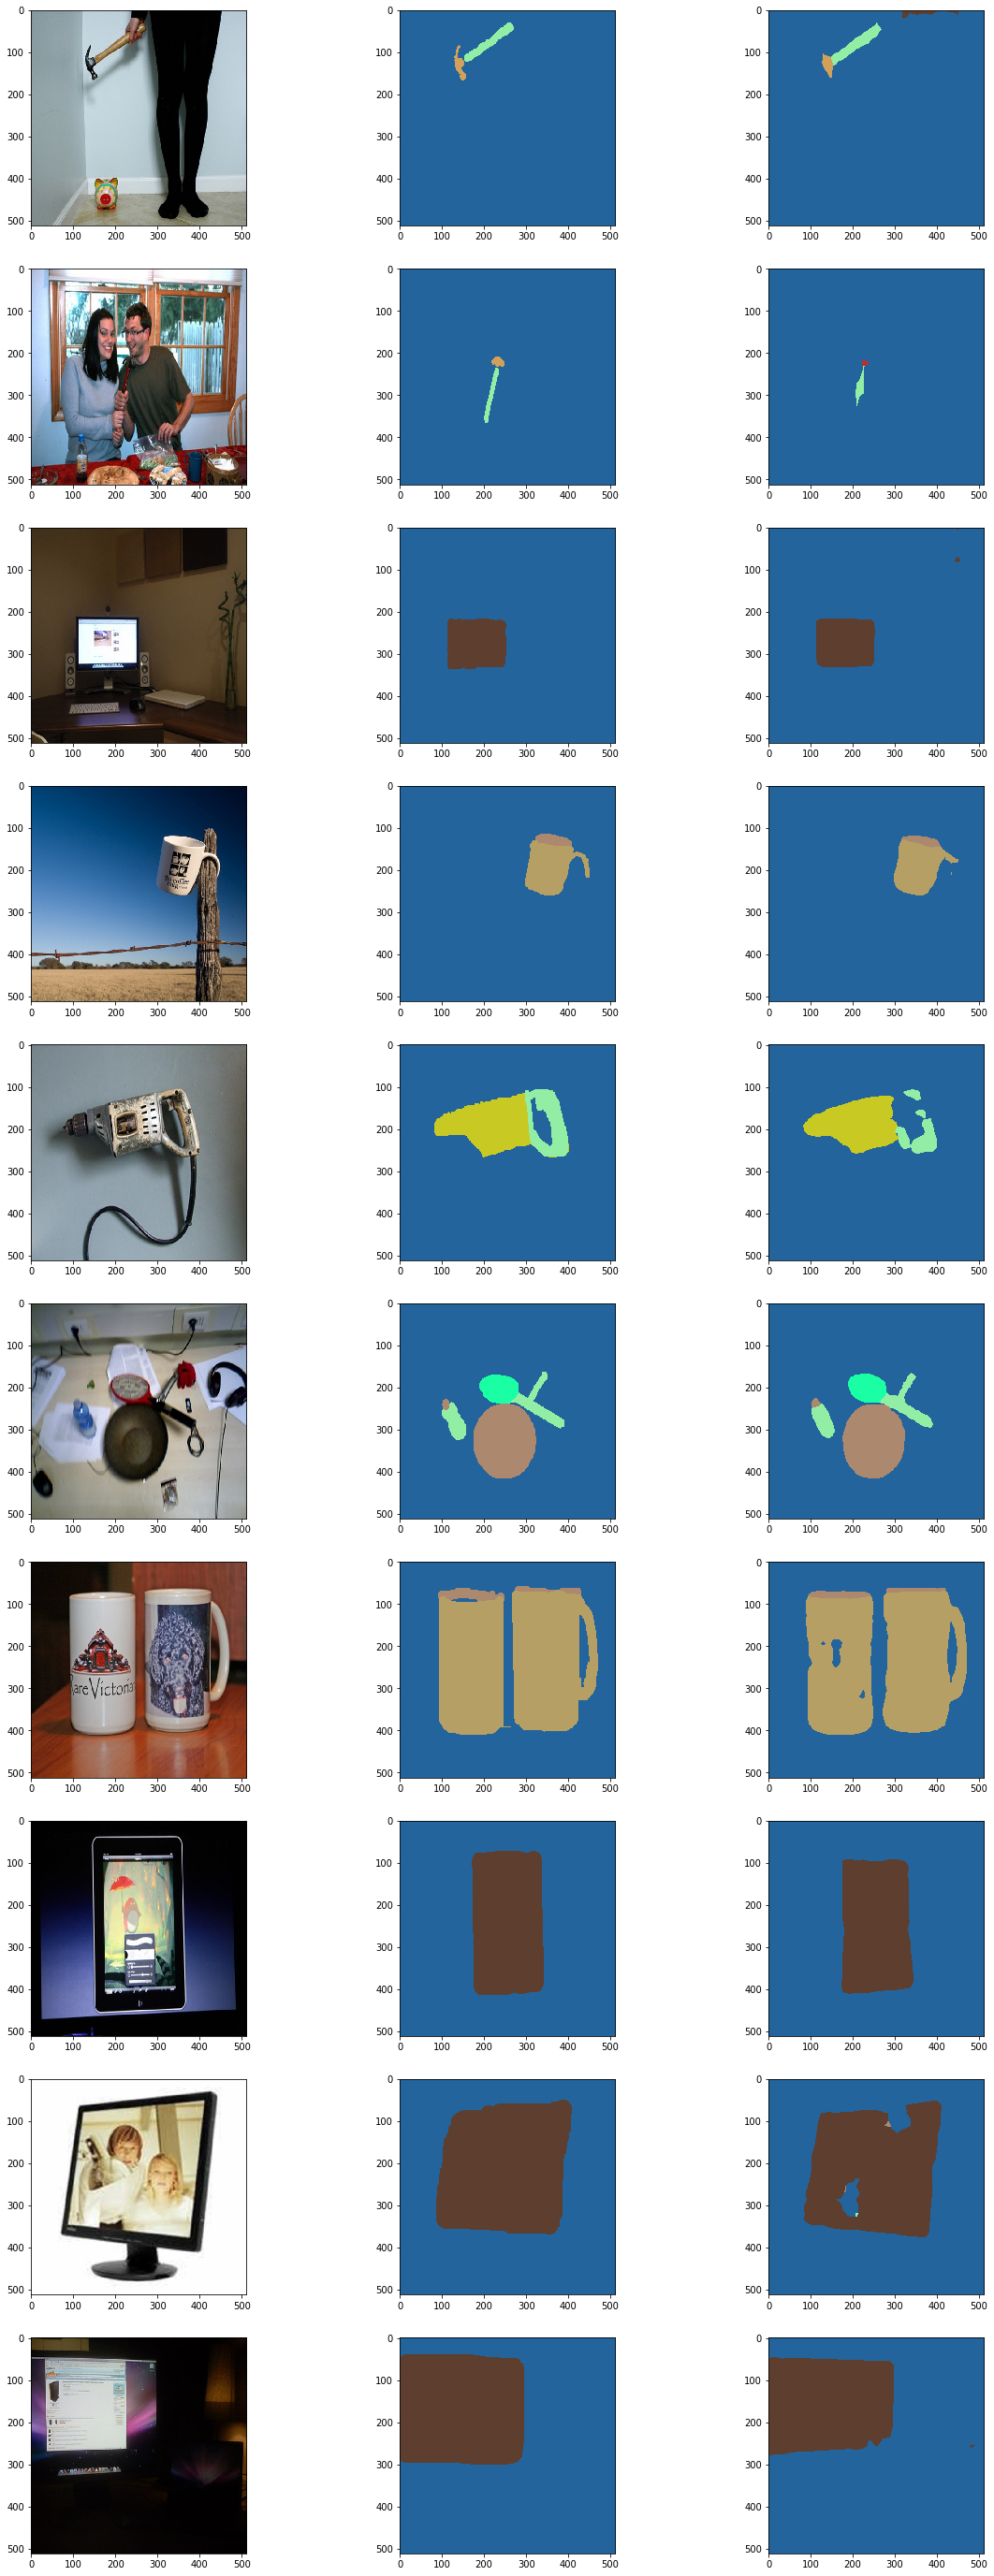

In [22]:
# Borrowed from https://github.com/divamgupta/image-segmentation-keras
# Thanks dude.
import glob
import numpy as np
import cv2
import random
import argparse
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline

def imageSegmentationGenerator( images_path, GT_path, segs_path, n_classes, n_visualize = 10):
    assert images_path[-1] == '/'
    assert segs_path[-1] == '/'
    assert GT_path[-1] == '/'

    segmentations  = glob.glob( segs_path + "*.png" )
    #segmentations.sort()
    #random.seed(10)
    random.seed(12)
    random.shuffle(segmentations)
    colors = [  ( random.randint(0,255),random.randint(0,255),random.randint(0,255)   ) for _ in range(n_classes)  ]

    #assert len( images ) == len(segmentations)

    rows, columns = (min(n_visualize, len(segmentations)), 3)
    fig=plt.figure(figsize=(20,5*rows))
    for idx, seg_fn in enumerate(segmentations):
        seg_fn_handle = os.path.splitext(os.path.basename(seg_fn))[0]
        im_fn = os.path.join(images_path, seg_fn_handle+'.jpg')
        gt_fn = os.path.join(GT_path, seg_fn_handle+'.png')
        print(idx, '/', len(segmentations), ":", seg_fn_handle)

        img = cv2.imread( im_fn )
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gt  = cv2.imread( gt_fn )
        seg = cv2.imread( seg_fn )
        # print(img.shape, gt.shape, seg.shape)
        print(np.unique(seg))

        seg_img = np.zeros_like( img )
        gt_img = np.zeros_like( img )

        for c in range(n_classes):
            seg_img[:,:,0] += ( (seg[:,:,0] == c )*( colors[c][0] )).astype('uint8')
            seg_img[:,:,1] += ((seg[:,:,0] == c )*( colors[c][1] )).astype('uint8')
            seg_img[:,:,2] += ((seg[:,:,0] == c )*( colors[c][2] )).astype('uint8')
            gt_img[:,:,0] += ( (gt[:,:,0] == c )*( colors[c][0] )).astype('uint8')
            gt_img[:,:,1] += ((gt[:,:,0] == c )*( colors[c][1] )).astype('uint8')
            gt_img[:,:,2] += ((gt[:,:,0] == c )*( colors[c][2] )).astype('uint8')

        fig.add_subplot(rows, columns, 3*idx+1)
        plt.imshow( img )
        fig.add_subplot(rows, columns, 3*idx+2)
        plt.imshow( gt_img )
        fig.add_subplot(rows, columns, 3*idx+3)
        plt.imshow( seg_img )
        if idx >= n_visualize-1:
            break
    plt.show()

if __name__ == '__main__':
    img_path = '/home/niu/Liang_Niu3/IIT_Affordances_2017/rgb/'
    pred_path = '/home/niu/src/Keras-FCN/Models/AtrousFCN_Resnet50_16s/res/' # predicted result
    GT_path = '/home/niu/Liang_Niu3/IIT_Affordances_2017/affordances_labels_png/' # Ground Truth
    n_classes = 10
    print(f"img_path:{img_path}, pred_path:{pred_path}, GT_path:{GT_path}, n_classes:{n_classes}")
    imageSegmentationGenerator(img_path, GT_path, pred_path, n_classes)
